In [323]:
# The below data analysis looks at mice tumor volumes and how these volumes were affected with various drugs. 
# A total of 249 mice were tested on 10 different drugs. The ratio of male to female mice were about equal (refer to pie 
# charts below).

# The data for four of the drugs; Capomulin, Ramicane, Infubinol, and Ceftamin, once spread onto a boxplot showed only
# one outlier in the drug Infubinol which has been colored in red in the boxplot graph. The boxplots also clearly show that the 
# data gathered for the drugs Capomulin and Ceftamin were unevently distributed towards the higher end of the spectrum for 
# tumor volumes. Infubinol and Ramicane however, were reasonably distributed once Ramicane's outlier was dropped. 

# Despite this, it was decided to continue with analysis on the results from the drug Capomulin. 

# One mouse that was on the Capomulin treatment was chosen at random. With continuous treatment on Capomulin, the tumor size for
# mouse s185 decreased from 45 mm3 to less than 20 mm3 from a timepoint of 0 to 45. This shows promising results as a skin cancer
# medication. 

# Obviously mice come in varieties and one of the factors that was looked at was weight. The average tumor size was compared with
# the weight of the mice and it was discovered that the tumor size was directly related. This could simply
# be a case of a skin tumor taking up a percentage of a body, rather than weight be an indication of immunity weaknesses. 
# However more analysis would be required in this factor before any relationship between the two factors is determined. 


In [324]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_df=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
merged_df

# Combine the data into a single dataset

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [325]:
# Checking the number of mice.
no_of_mice=len(mouse_metadata)
no_of_mice

249

In [326]:
# Find any duplicate time points for mouse ID's and remove them
mouse_data=merged_df.drop_duplicates()
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [327]:
 # Checking the number of mice in the clean DataFrame.
no_of_mice_check=mouse_data["Mouse ID"].value_counts()
no_of_mice_check

g989    12
w350    10
e213    10
j989    10
a444    10
        ..
h428     1
v199     1
n482     1
x226     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [328]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=mouse_data.groupby("Drug Regimen").mean()
mean=mean.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})
median=mouse_data.groupby("Drug Regimen").median()
median=median.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})
variance=mouse_data.groupby("Drug Regimen").var()
variance=variance.rename(columns={"Tumor Volume (mm3)":"VAR Tumor Volume (mm3)"})
std_dev=mouse_data.groupby("Drug Regimen").std()
std_dev=std_dev.rename(columns={"Tumor Volume (mm3)":"Std. Dev Tumor Volume (mm3)"})
SEM=mouse_data.groupby("Drug Regimen").sem()
SEM=SEM.rename(columns={"Tumor Volume (mm3)":"SEM Tumor Volume (mm3)"})

drug_stats=pd.DataFrame({
    "Mean Tumor Volume":mean["Mean Tumor Volume (mm3)"],
    "Median Tumor Volume":median["Median Tumor Volume (mm3)"],
    "VAR Tumor Volume": variance["VAR Tumor Volume (mm3)"],
    "STD DEV Tumor Volume":std_dev["Std. Dev Tumor Volume (mm3)"],
    "SEM Tumor Volume":SEM["SEM Tumor Volume (mm3)"]
})

drug_stats

,Mean Tumor Volume,Median Tumor Volume,VAR Tumor Volume,STD DEV Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


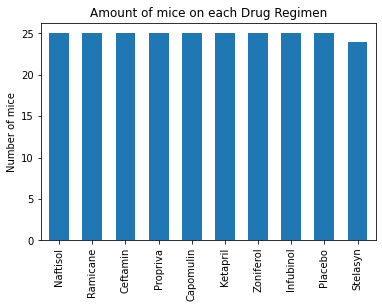

In [329]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_drug=mouse_metadata["Drug Regimen"].value_counts()

barplot_pandas=mice_per_drug.plot(kind="bar",ylabel="Number of mice", width=0.6, title="Amount of mice on each Drug Regimen")

Text(0, 0.5, 'Number of mice')

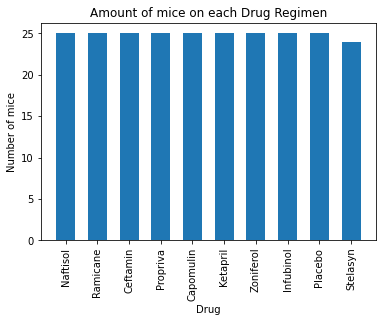

In [330]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_per_drug

barplot_pyplot=plt.bar(mice_per_drug.index,mice_per_drug.tolist(),width=0.6)
plt.xticks(rotation=90)
plt.title("Amount of mice on each Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Number of mice")



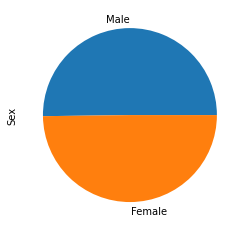

In [331]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender=mouse_metadata["Sex"].value_counts()
pie_pandas=mice_gender.plot(kind="pie")

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

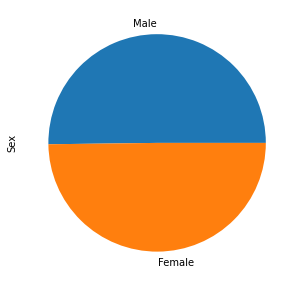

In [332]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_pyplot=mice_gender.plot.pie(subplots=True, figsize=(5,5))
pie_pyplot

In [333]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume=mouse_data.loc[mouse_data.groupby('Mouse ID')['Timepoint'].idxmax()]

#Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol_fourdrugs = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_tumor_vol_fourdrugs=final_tumor_vol_fourdrugs.sort_values(by="Tumor Volume (mm3)",ascending=False)
final_tumor_vol_fourdrugs.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
637,c139,Infubinol,Male,11,28,45,72.226731,2
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
463,a203,Infubinol,Female,20,23,45,67.973419,2
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
949,i386,Infubinol,Female,23,29,40,67.289621,4
1053,k483,Infubinol,Female,20,30,45,66.196912,3
540,a685,Infubinol,Male,8,30,45,66.083066,3


In [334]:
#Calculate quartiles and IQR
quartiles=final_tumor_vol_fourdrugs.quantile([0.25,0.5,0.75])
quartiles=quartiles["Tumor Volume (mm3)"]
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
IQR=round(upperq-lowerq,2)

print ("quartiles are " + str("\n") + str( quartiles) + "and IQR is " + str( IQR))

quartiles are 
0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64and IQR is 22.74


Text(0.5, 0.98, '')

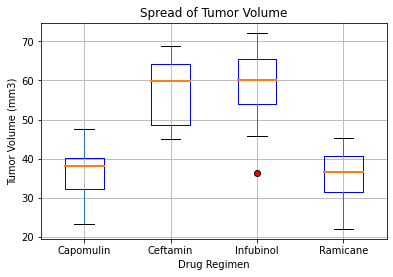

In [335]:
#Create 4 x boxplots
final_tumor_vol_fourdrugs.boxplot(by="Drug Regimen", column="Tumor Volume (mm3)",fontsize=10,color=dict(boxes="b",medians="b"),
                                  medianprops=dict(linestyle='-', linewidth=2),
                                 flierprops=dict(markeredgecolor='black', markerfacecolor='r'))
title_boxplot = 'Spread of Tumor Volume'
plt.title( title_boxplot )
plt.ylabel ("Tumor Volume (mm3)")
plt.suptitle('') 


In [336]:
#Above boxplot confirms that there are no outliers in data

Text(0, 0.5, 'Tumor size (mm3)')

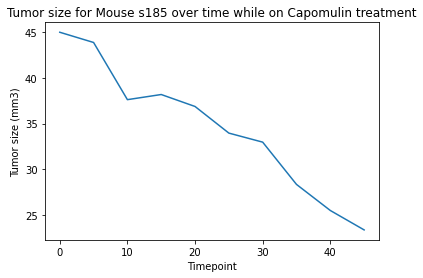

In [337]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin=mouse_data.loc[mouse_data["Drug Regimen"]=="Capomulin"]
capomulin=mouse_data.loc[mouse_data["Mouse ID"]=="s185"]
x_axis=capomulin["Timepoint"]
y_axis=capomulin["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)

plt.title("Tumor size for Mouse s185 over time while on Capomulin treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor size (mm3)")


In [338]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight=mouse_data[["Weight (g)","Tumor Volume (mm3)"]]
mouse_weight.head()

,Weight (g),Tumor Volume (mm3)
0,16,45.000000
1,16,38.825898
2,16,35.014271
3,16,34.223992
4,16,32.997729


In [339]:
tumor_avg=mouse_weight.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
tumor_avg.head()
tumor_avg.index

Int64Index([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype='int64', name='Weight (g)')

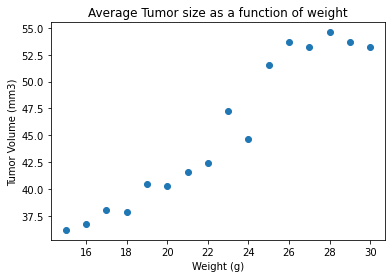

In [340]:
x_values = tumor_avg.index
y_values = tumor_avg
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Average Tumor size as a function of weight")
plt.show()

In [341]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)




Float64Index([  34.7662673641285,  36.17727475798651, 37.588282151844524,
               38.99928954570254, 40.410296939560546,  41.82130433341855,
               43.23231172727657, 44.643319121134574,  46.05432651499258,
              47.465333908850596,  48.87634130270861,  50.28734869656661,
              51.698356090424625,  53.10936348428264,  54.52037087814065,
               55.93137827199865],
             dtype='float64', name='Weight (g)')


In [342]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 1.41x +13.6


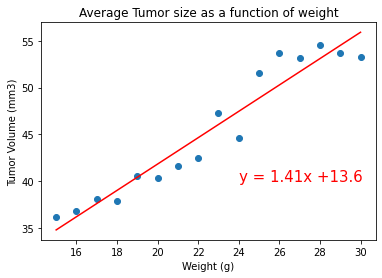

In [343]:
x_values = tumor_avg.index
y_values = tumor_avg
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Average Tumor size as a function of weight")
plt.annotate(line_eq,(24,40),fontsize=15,color="red")
plt.show()

